<a href="https://colab.research.google.com/github/mahin-arvind/HEALTH-INSURANCE-CROSS-SELL-PREDICTION/blob/main/Copy_of_HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

## **Loading Dataset** 

In [ ]:
#Importing basic libraries for data handling and viz 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [ ]:
#linking colab notebook with drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing dataset from drive location
path = '/content/drive/MyDrive/Datasets/Classification/HEALTH INSURANCE CROSS SELL PREDICTION/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv'
df = pd.read_csv(path)

##Inspection

In [ ]:
#function to inspect shape
df.shape

(381109, 12)

----
> * **The given dataset contains 381,109 entries. There are 12 attributes recorded for each entry**
----

In [ ]:
#checking out first five samples
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
#displaying all attributes in the dataset
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
#Dataset information: displays non null value counts in each column and its data type
(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


----
> * **There are no null objects observed in the dataset**

>* **'Gender', 'Vehicle Age' and 'Vehicle Damage' are non-numerical in nature**

> * **Column 'id' is dropped as it is irrelevant**
----

In [ ]:
#dropping ID as it isnt relevant to the customer's response
df.drop('id', axis =1, inplace = True)

**Looking for Duplicate values**

In [ ]:
df[df.duplicated()]

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
35754,Male,23,1,15.0,0,< 1 Year,No,2630.0,152.0,173,0
41515,Male,39,1,30.0,0,1-2 Year,Yes,2630.0,124.0,27,0
43618,Male,40,1,28.0,1,1-2 Year,No,2630.0,124.0,209,0
44049,Male,39,1,28.0,0,1-2 Year,Yes,2630.0,124.0,64,0
44203,Male,44,1,28.0,0,> 2 Years,Yes,2630.0,124.0,155,1
...,...,...,...,...,...,...,...,...,...,...,...
379273,Male,58,1,30.0,1,1-2 Year,No,2630.0,152.0,150,0
379451,Male,41,1,30.0,0,1-2 Year,Yes,2630.0,156.0,111,0
379788,Male,38,1,28.0,1,1-2 Year,No,2630.0,124.0,42,0
380673,Female,37,1,28.0,0,1-2 Year,Yes,2630.0,156.0,176,0


> * **There are 269 duplicates identified in the dataset**




In [ ]:
#dropping duplicate values from the dataset
df = df.drop_duplicates(keep='first')

**Looking for Missing Values**

In [ ]:
#checking for null values 
df.isna().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

> **No missing values present in the dataset**

In [ ]:
#statistical description of numerical features in the dataset
df.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,380840.000000,380840.000000,380840.000000,380840.000000,380840.000000,380840.000000,380840.000000,380840.000000
mean,38.823593,0.997868,26.388307,0.458208,30584.016078,112.030225,154.344607,0.122584
std,15.513206,0.046126,13.229907,0.498251,17203.258664,54.206194,83.670240,0.327960
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24426.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31678.500000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39408.000000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


#**Exploratory Data Analysis**

**Splitting columns to numerical and categorical**

In [ ]:
numeric_features = ['Age','Annual_Premium', 'Vintage'] # numerical features
cat_encoded_feature = ['Policy_Sales_Channel','Region_Code'] # categorical features that were encoded numerically
cat_label_features = ['Vehicle_Age', 'Gender' ,'Vehicle_Damage' ] # categorical features
cat_boolean_features = ['Driving_License','Previously_Insured', 'Response'] # categorical features with boolean values
cat_features = cat_label_features + cat_boolean_features + cat_encoded_feature # all categorical features

##Univariate Analysis

####**Distribution Plot**

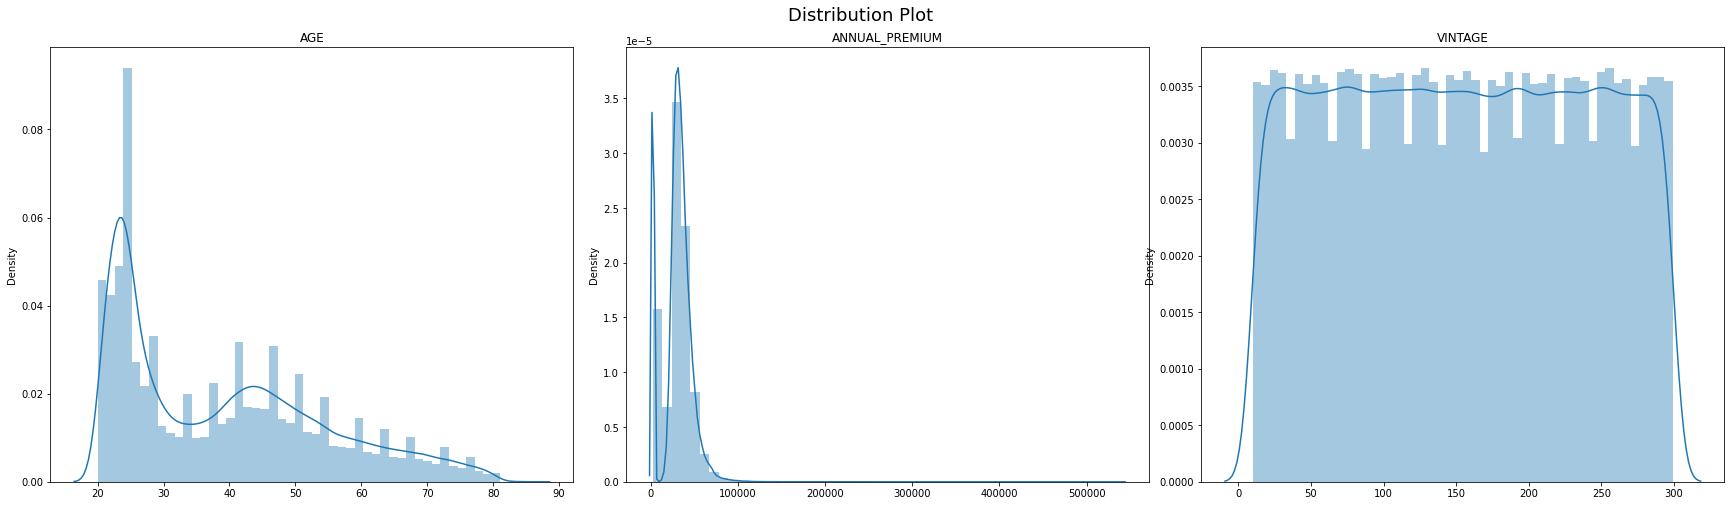

In [ ]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(30, 8))
plt.suptitle("Distribution Plot", fontsize=18, y=0.95)
#ploting distribution of numerical features
for n, ticker in enumerate(numeric_features):
  # add a new subplot iteratively
  ax = plt.subplot(1,3, n + 1)
  plt.subplots_adjust(hspace=0.1, wspace=0.1)
  # filter df and plot ticker on the new subplot axis
  sns.distplot(df[ticker])
  ax.set_title(ticker.upper())
  ax.set_xlabel("")

---
>* **Annual Premium shows near normal distribution**

> * **The age of a large number of population are in their early twenty's and mid forty's.**
---

#### **Box Plot**

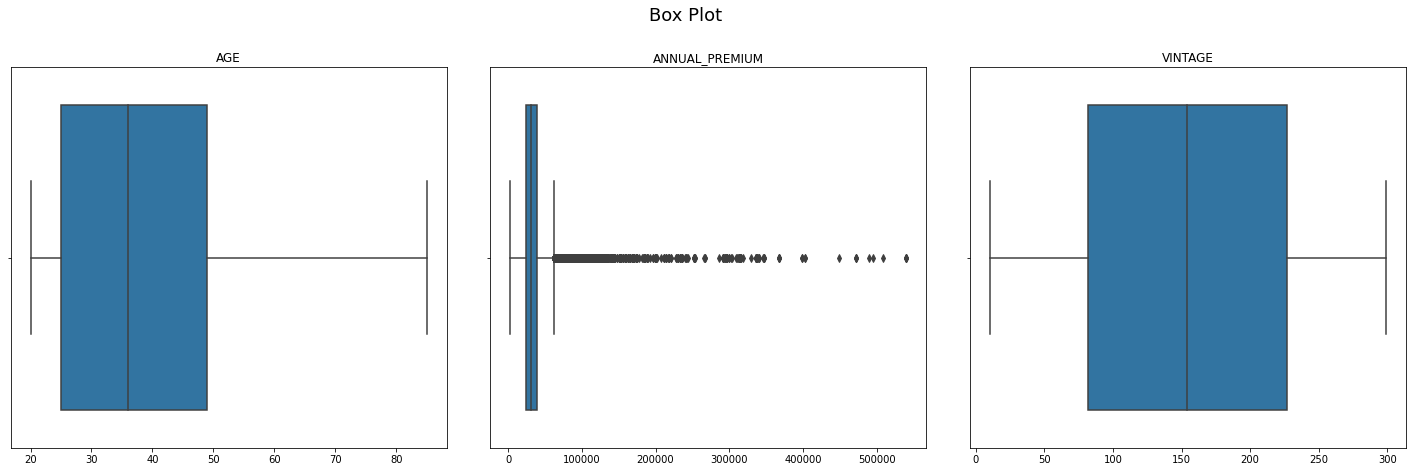

In [ ]:
plt.figure(figsize=(25, 7))
plt.suptitle("Box Plot", fontsize=18, y=1)
#plotting box plot to look for outliers in numerical features
for n, ticker in enumerate(numeric_features):
  # add a new subplot iteratively
  ax = plt.subplot(1,3, n + 1)
  plt.subplots_adjust(hspace=0.1, wspace=0.1)
  # filter df and plot ticker on the new subplot axis
  sns.boxplot(df[ticker])
  ax.set_title(ticker.upper())
  ax.set_xlabel("")

---
> * **Annual Premium is the only numerical feature with outliers**
---

###**Count Plot**

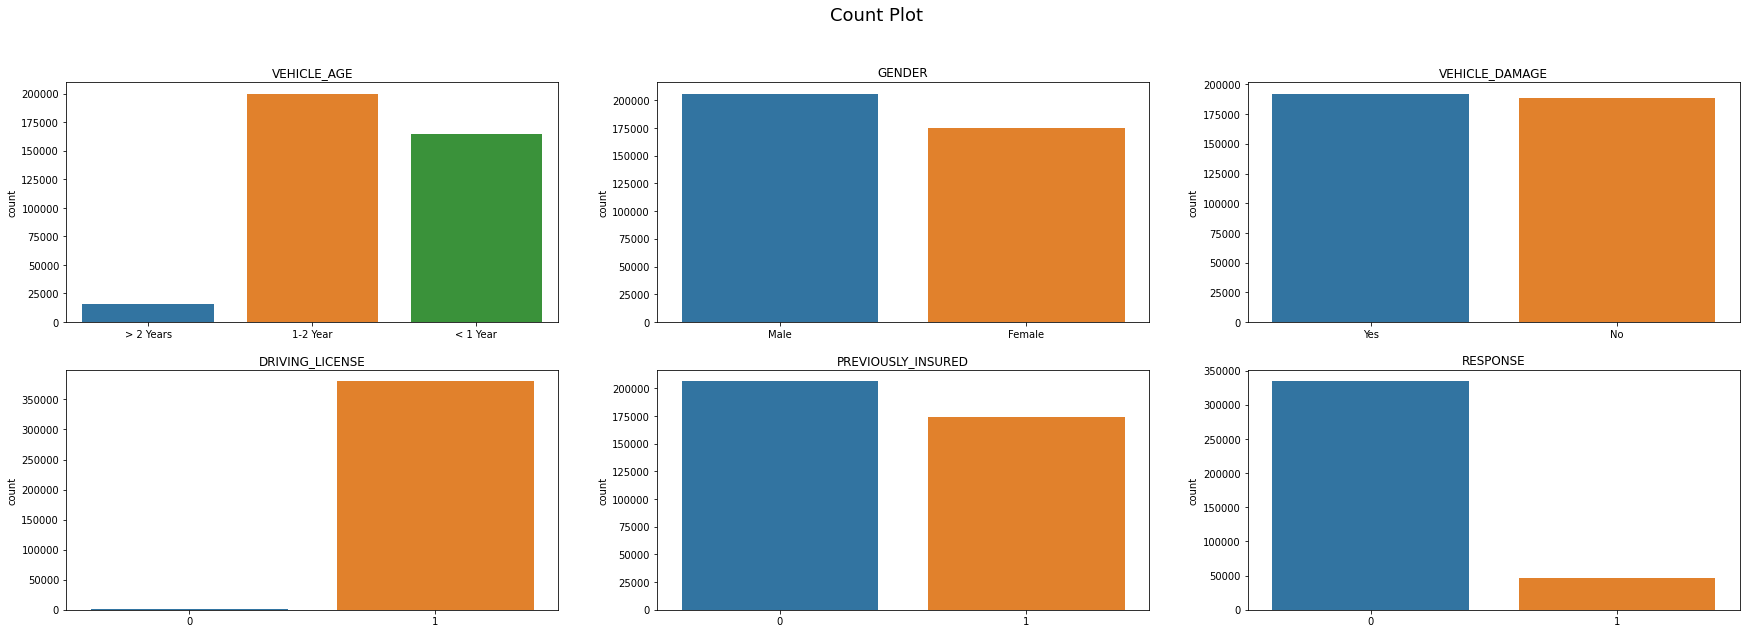

In [ ]:
#plotting countplot for categorical data
plt.figure(figsize=(30, 15))
plt.suptitle("Count Plot", fontsize=18, y=0.95)

for n, ticker in enumerate(cat_features[:-2]):
  # add a new subplot iteratively
  ax = plt.subplot(3,3, n + 1)
  plt.subplots_adjust(hspace=0.2, wspace=0.2)
  # filter df and plot ticker on the new subplot axis
  sns.countplot(df[ticker])
  ax.set_title(ticker.upper())
  ax.set_xlabel("")

---
> * **There is a very low amount of people without driving license**

> * **The target, Responses,  has more negative response than positive responses which indicates that the dataset is IMBALANCED.**

> * **The population's Vehicle Age lies in the range of 0-2 years. This could be because most people subscribe to insurances succeeding the purchase of a vehicle**
---

In [ ]:
#Checking the ratio of positive responses and all responses
df[df['Response']== 1].shape[0]/df.shape[0]

0.1225842873647726

> * **Only 12.25 percent of the data contains positive responders**

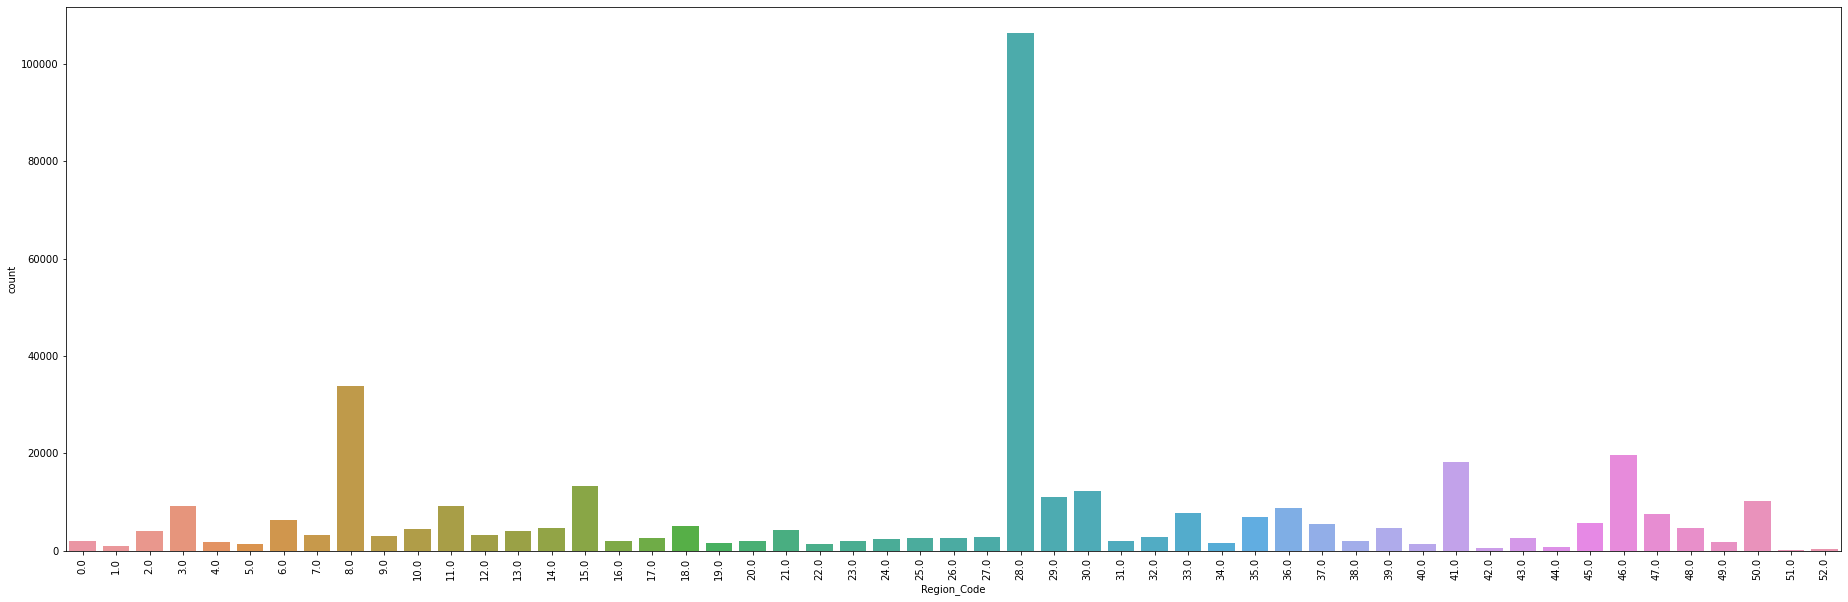

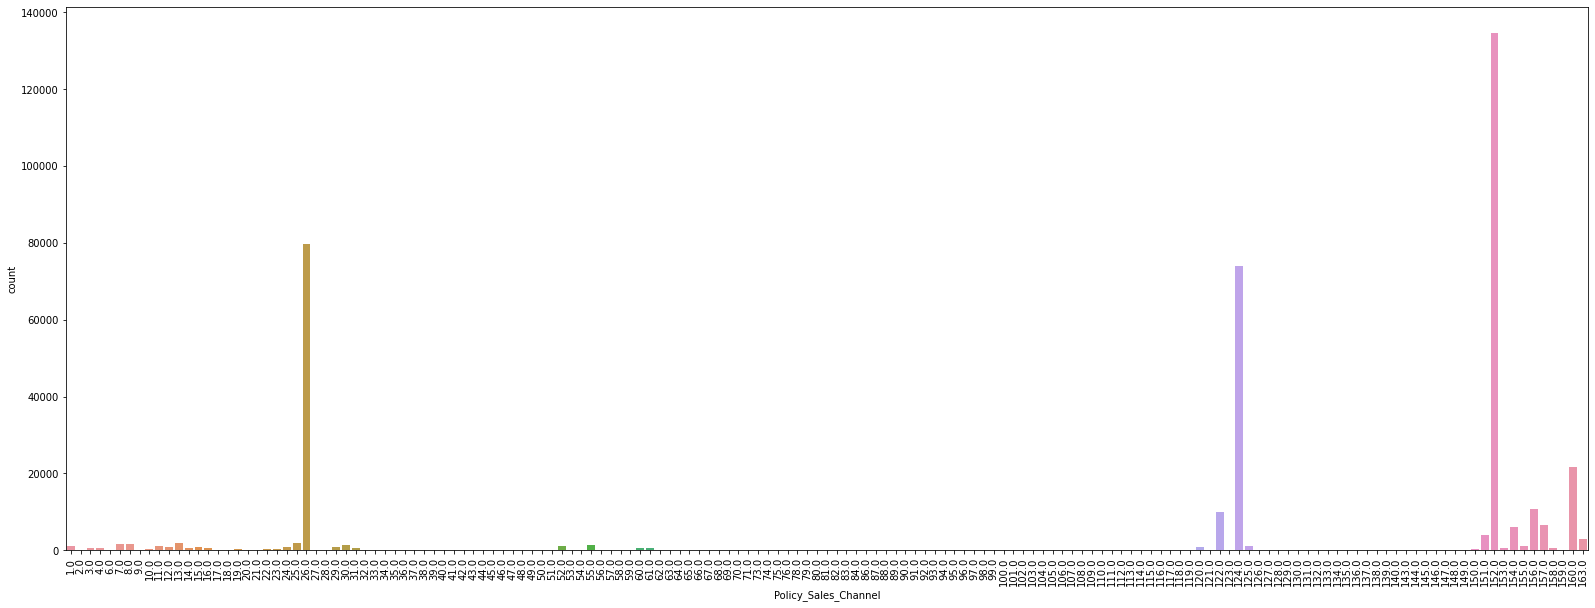

In [ ]:
#plotting countplot for Region Code
plt.figure(figsize = (70,10))
ax = plt.subplot(1,2, 1)
plt.xticks(rotation = 90)
sns.countplot(df['Region_Code'])
plt.show()
#plotting countplot for Policy Channel Number              
plt.figure(figsize = (60,10))
ax = plt.subplot(1,2, 2)
plt.xticks(rotation = 90)
sns.countplot(df['Policy_Sales_Channel'])
plt.show()
                  
                           

---
> * **Most policy holders of the health insurance company come from 3 region codes, 28,8 and 41**

> * **Policy Sales Channel number 152, 26.0 and 124 are the most common policy channels.**
---

## Bivariate Analysis

####Correlation Heatmap

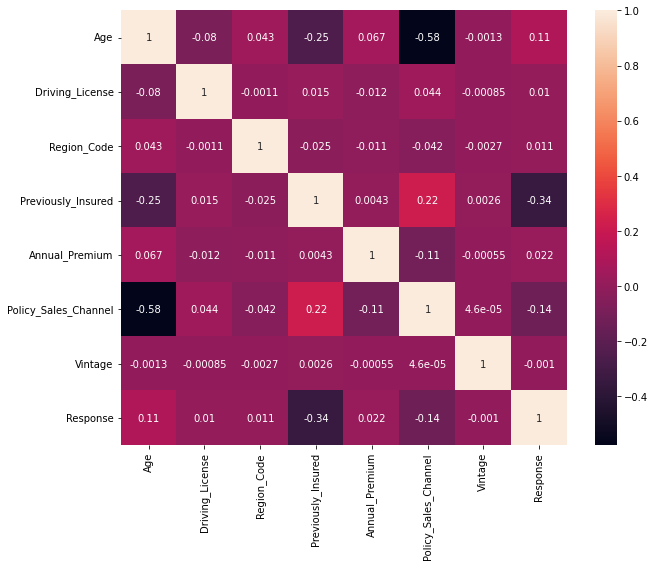

In [ ]:
#using sns to plot correlation values between attributes in the dataset
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot = True)

---
> * **No correlation is observed between numerical features**

> * **Age and Policy_sales_channel exhibit correlation of -0.58**
---

#### Scatter Plot

In [ ]:
#duplicating dataframe
a = df.copy()

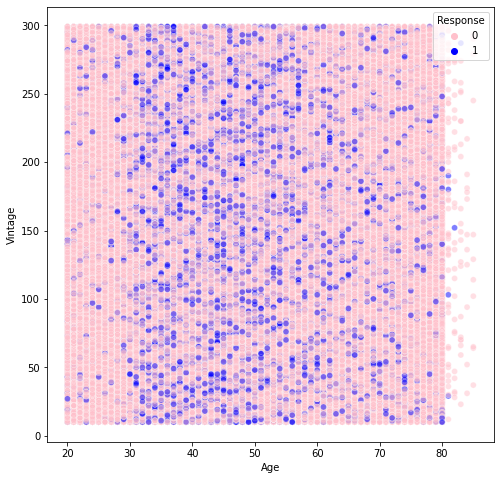

In [ ]:
#plotting relationship between age and vintage
plt.figure(figsize=(8,8))
sns.scatterplot(a['Age'],a['Vintage'],hue = df['Response'],alpha = 0.5, palette=['pink','blue'])

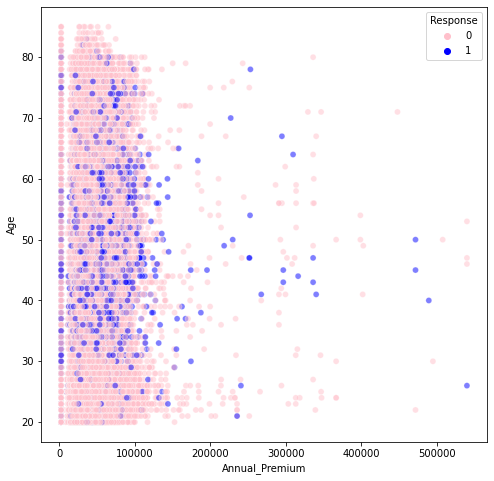

In [ ]:
#plotting relationship between Age and Annual Premium
plt.figure(figsize=(8,8))
sns.scatterplot(a['Annual_Premium'],a['Age'],hue = df['Response'],alpha = 0.5,palette=['pink','blue'])

* Most postive responders are in between the age of 30 and 65 and earn have an annual premium within $100,000

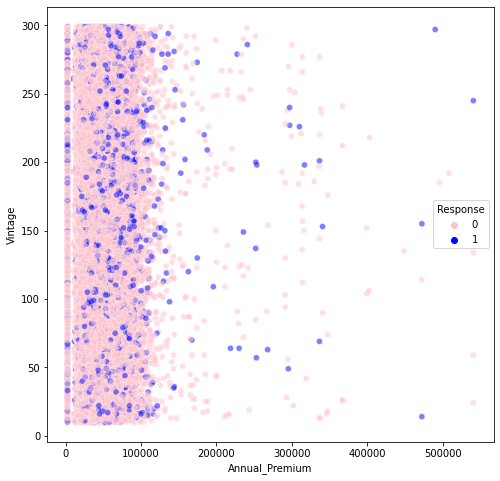

In [ ]:
#plotting relationship between vintage and Annual premium
plt.figure(figsize=(8,8))
sns.scatterplot((a['Annual_Premium']),(a['Vintage']),hue = df['Response'],alpha = 0.5,palette=['pink','blue'])

#### VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = (df.loc[:,numeric_features].copy())
#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif

,VIF,variable
0,4.157174,Age
1,3.360362,Annual_Premium
2,3.269930,Vintage


#### Test of Association

In [ ]:
pip install researchpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import researchpy as rp


In [ ]:
cat_features

['Vehicle_Age',
 'Gender',
 'Vehicle_Damage',
 'Driving_License',
 'Previously_Insured',
 'Response',
 'Policy_Sales_Channel',
 'Region_Code']

In [ ]:
from statsmodels.stats.contingency_tables import Table2x2
catcopy = cat_features.copy()
#dictionary for generating association report 
table = {'feature1':[],
         'feature2':[], 
         'Cramers_V_Score':[], 
         "Interpretation":[]}
#looping through features to calculate cramers v score and interpretation
for ftr1 in cat_features:
  for ftr2 in catcopy:
    if ftr1 != ftr2:
      #generates crosst tabs| number of occurences in intersecting categories from the two attributes
      crosstab, test_results, expected = rp.crosstab(df[ftr1], df[ftr2],
                                                    test= "chi-square",
                                                    expected_freqs= True,
                                                    prop= "cell")
      #saving score
      score = (test_results.loc[2, 'results'])
      table['feature1'].append(ftr1)
      table['feature2'].append(ftr2)
      #updating interpretation
      table['Cramers_V_Score'].append(score)
      if score > 0.25:
        table['Interpretation'].append("Very Strong")
      elif score > 0.15:
        table['Interpretation'].append("Strong")
      elif score > .1:
        table['Interpretation'].append("Moderate")
      elif score >.05:
        table['Interpretation'].append("Weak")
      else:
        table['Interpretation'].append("None/Very Weak")
  catcopy.remove(ftr1)

table = pd.DataFrame(table)

In [ ]:
table[table.Cramers_V_Score > 0.25]

,feature1,feature2,Cramers_V_Score,Interpretation
1,Vehicle_Age,Vehicle_Damage,0.3968,Very Strong
3,Vehicle_Age,Previously_Insured,0.3809,Very Strong
5,Vehicle_Age,Policy_Sales_Channel,0.6226,Very Strong
6,Vehicle_Age,Region_Code,0.2948,Very Strong
14,Vehicle_Damage,Previously_Insured,0.8241,Very Strong
15,Vehicle_Damage,Response,0.3544,Very Strong
16,Vehicle_Damage,Policy_Sales_Channel,0.4544,Very Strong
22,Previously_Insured,Response,0.3412,Very Strong
23,Previously_Insured,Policy_Sales_Channel,0.4401,Very Strong
25,Response,Policy_Sales_Channel,0.2634,Very Strong


In [ ]:
table[table.Interpretation == 'Strong']

,feature1,feature2,Cramers_V_Score,Interpretation
0,Vehicle_Age,Gender,0.1668,Strong
4,Vehicle_Age,Response,0.2219,Strong
11,Gender,Policy_Sales_Channel,0.1874,Strong
17,Vehicle_Damage,Region_Code,0.2319,Strong
24,Previously_Insured,Region_Code,0.2345,Strong
27,Policy_Sales_Channel,Region_Code,0.1580,Strong


In [ ]:
table[table.Interpretation == 'Moderate']

,feature1,feature2,Cramers_V_Score,Interpretation
26,Response,Region_Code,0.1381,Moderate


In [ ]:
table[table.Interpretation == 'Weak']

,feature1,feature2,Cramers_V_Score,Interpretation
7,Gender,Vehicle_Damage,0.0916,Weak
9,Gender,Previously_Insured,0.0819,Weak
10,Gender,Response,0.0525,Weak
12,Gender,Region_Code,0.0686,Weak
20,Driving_License,Policy_Sales_Channel,0.0583,Weak


In [ ]:
table[table.Interpretation == "None/Very Weak"]

,feature1,feature2,Cramers_V_Score,Interpretation
2,Vehicle_Age,Driving_License,0.0402,None/Very Weak
8,Gender,Driving_License,0.0184,None/Very Weak
13,Vehicle_Damage,Driving_License,0.0166,None/Very Weak
18,Driving_License,Previously_Insured,0.0150,None/Very Weak
19,Driving_License,Response,0.0102,None/Very Weak
21,Driving_License,Region_Code,0.0232,None/Very Weak


In [ ]:
table[table.feature2 == 'Response'].sort_values('Cramers_V_Score', ascending = False)

,feature1,feature2,Cramers_V_Score,Interpretation
15,Vehicle_Damage,Response,0.3544,Very Strong
22,Previously_Insured,Response,0.3412,Very Strong
4,Vehicle_Age,Response,0.2219,Strong
10,Gender,Response,0.0525,Weak
19,Driving_License,Response,0.0102,None/Very Weak


In [ ]:
table[table.feature1 == 'Response'].sort_values('Cramers_V_Score', ascending = False)

,feature1,feature2,Cramers_V_Score,Interpretation
25,Response,Policy_Sales_Channel,0.2634,Very Strong
26,Response,Region_Code,0.1381,Moderate


**Upon Chi Square testing of categorical variables, we observe.**

* **Vehicle Age has a strong statistical relationships with all features and target.**

* **Vehicle_Damage , Previously_Insured, Policy Sales Channel have very strong and Vehicle_Age has strong association with the target variable**

* **Driving_License appears to have no or very weak statistical relationship on any other features or the target**

### Stacked Column Chart

In [ ]:
grouped = df.groupby(['Vehicle_Damage', 'Response'])
grouped.size()

Vehicle_Damage  Response
No              0           187581
                1              982
Yes             0           146574
                1            45703
dtype: int64

<Figure size 2160x720 with 0 Axes>

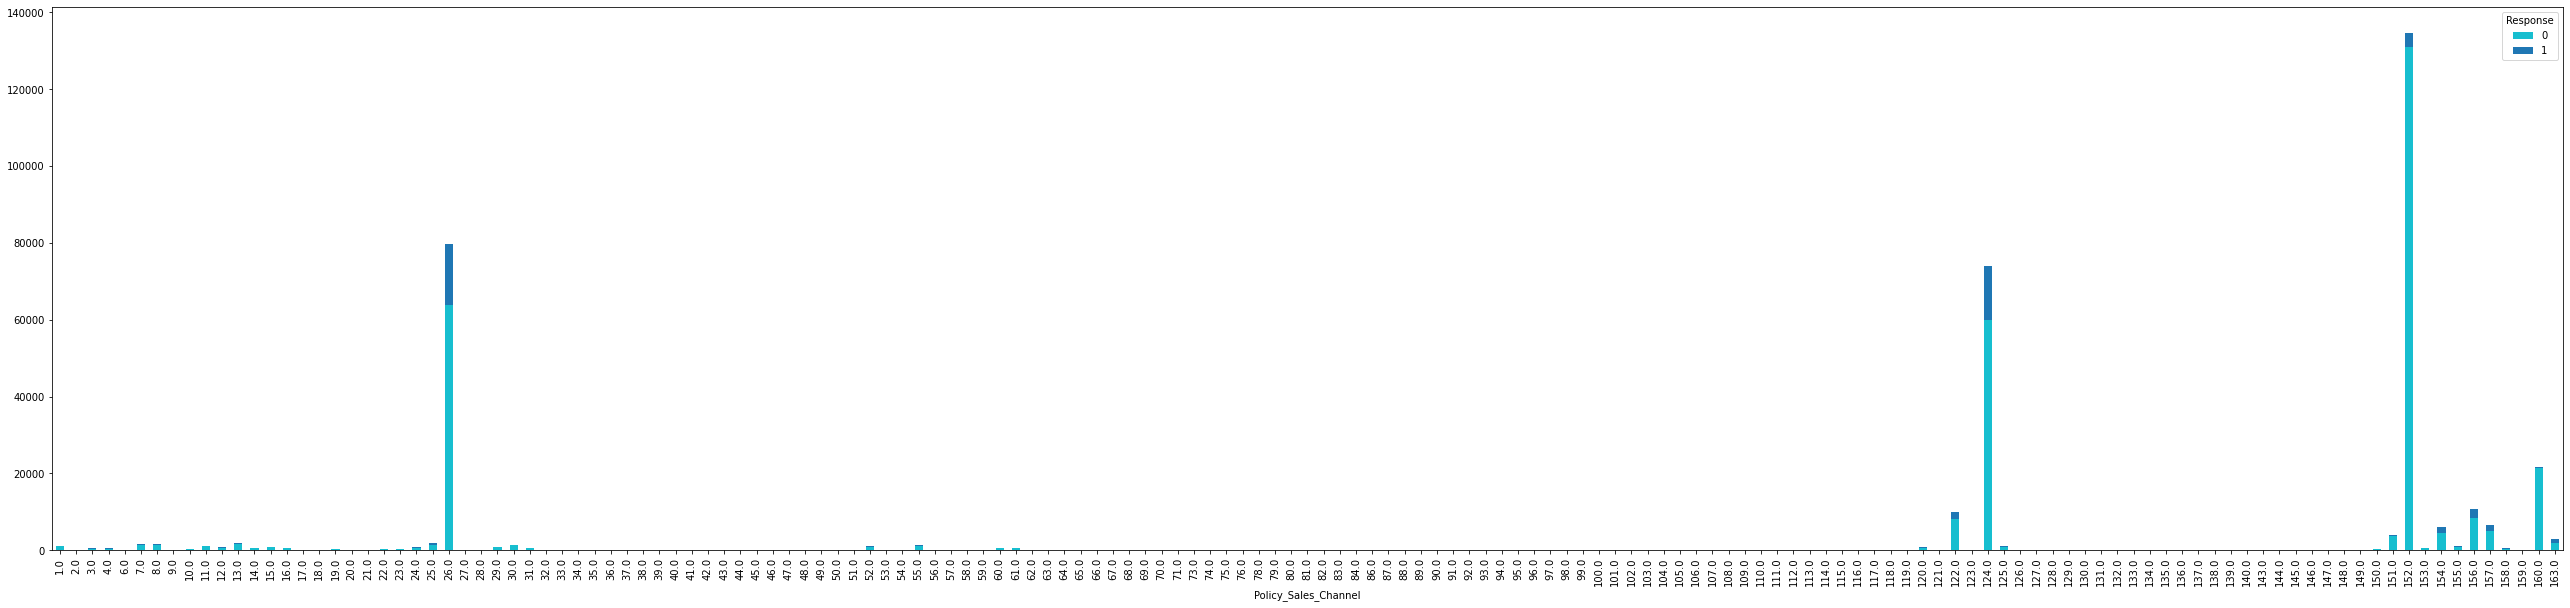

In [ ]:
#plotting stacked column chart for Policy Sales Channel
plt.figure(figsize = (30,10))
cross_tab_prop = pd.crosstab(index=df['Policy_Sales_Channel'],
                            columns=df['Response'])
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10_r',figsize = (45,10))


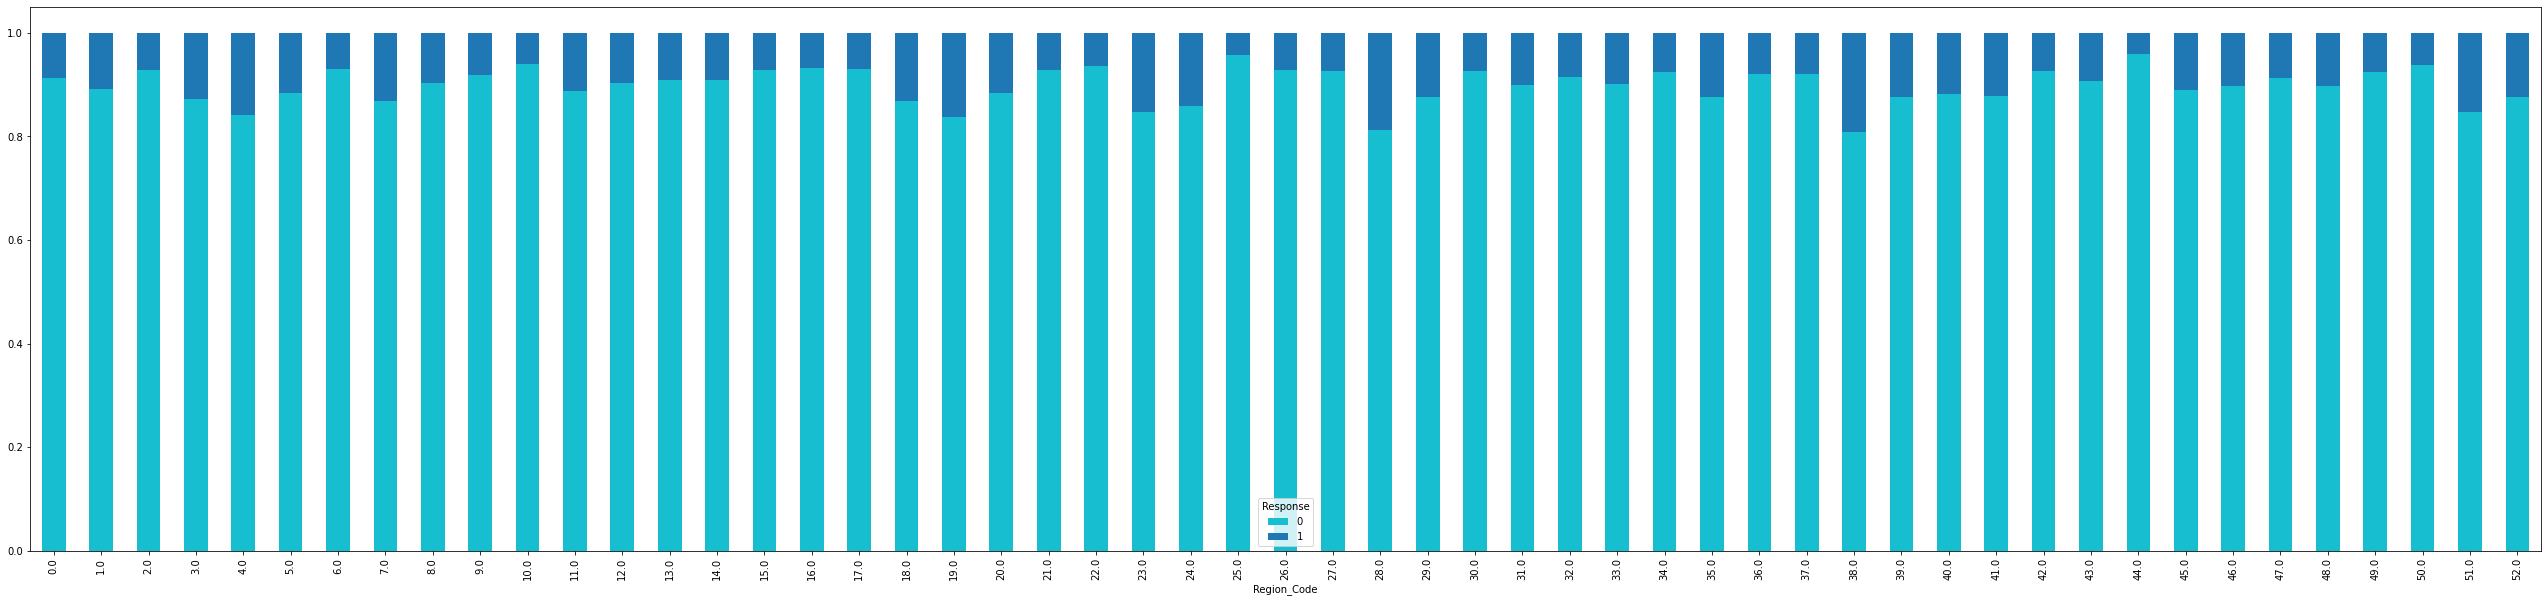

In [ ]:
#plotting normalized stacked column chart for Policy Sales Channel
cross_tab_prop = pd.crosstab(index=df['Region_Code'],
                            columns=df['Response'],normalize="index")
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10_r',figsize = (45,10))


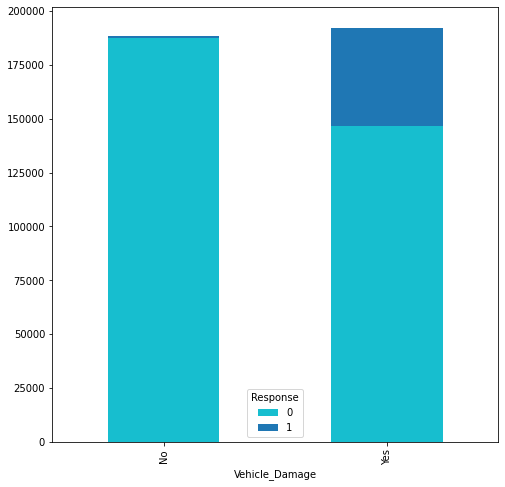

In [ ]:
#plotting stacked column chart for Vehicle Damage
cross_tab_prop = pd.crosstab(index=df['Vehicle_Damage'],
                            columns=df['Response'])
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10_r',figsize = (8,8))



>**A very large amount of positive respondents have had previous vehicle damage**

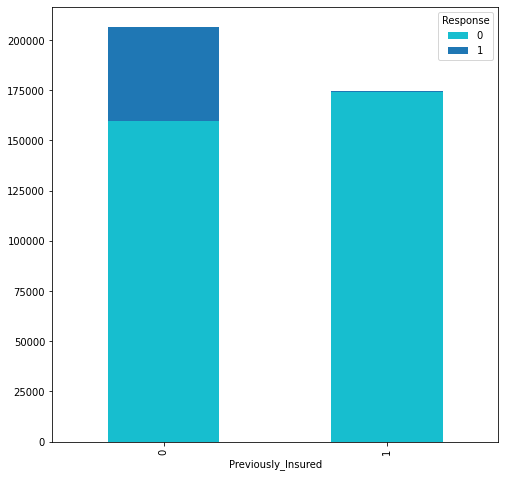

In [ ]:
#plotting stacked column chart for Previously Insured
cross_tab_prop = pd.crosstab(index=df['Previously_Insured'],
                            columns=df['Response'])
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10_r',figsize = (8,8))


>* **Rightly so, it makes sense that people who opt for insurance usually dont hold a vehicle insurance currently. Although, there are some who do get an insurance while being insured previously. One reason could be that their previous insurance would have been about to expire**

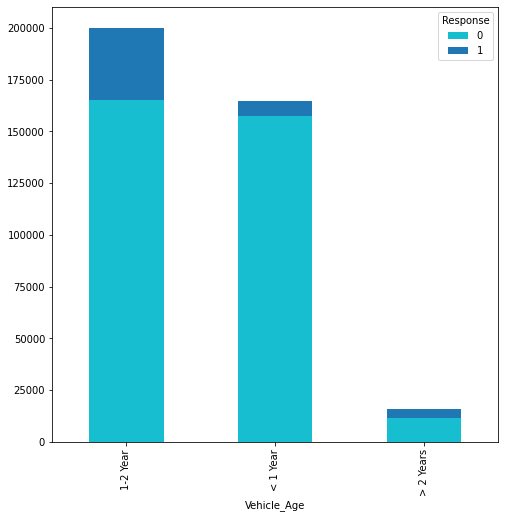

In [ ]:
#plotting stacked column chart for Vehicle Age
cross_tab_prop = pd.crosstab(index=df['Vehicle_Age'],
                            columns=df['Response'])
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10_r',figsize = (8,8))


>**Proportion of people that opt for insurance is lowest for people with vehicle age less than a year. This could be because they already hold a policy elsewhere.** 
**While we can observe there's higher chance a person with a vehicle age over a year would opt in for vehicle insurance**

#Feature Engineering

## **Outlier Treatment**

###**Treating Numerical Outliers** 

In [ ]:
for ftr in numeric_features: 
  print(ftr,'\n')
  q25, q75 = np.percentile(df[ftr], 25), np.percentile(df[ftr], 75)
  iqr = q75 - q25
  print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
  # calculate the outlier cutoff
  cut_off = iqr * 1.5
  lower, upper = q25 - cut_off, q75 + cut_off
  # identify outliers
  outliers = [x for x in df[ftr] if x < lower or x > upper]
  print('Identified outliers: %d' % len(outliers))
  #removing outliers
  if len(outliers)!=0:
    
    def label(row):
      if row[ftr] > upper: 
        return 1
      if row[ftr] < lower:
        return 1
      else:
        return 0

    def bin(row):
      if row[ftr]> upper:
        return upper
      if row[ftr] < lower:
        return lower
      else:
        return row[ftr]
    
    df[ftr + '_Outlier'] =  df.apply (lambda row: label(row), axis=1)
    df[ftr ] =  df.apply (lambda row: bin(row), axis=1)
    print(f"{ftr} Outliers Removed")
  print("\n-------\n")

Age 

Percentiles: 25th=25.000, 75th=49.000, IQR=24.000
Identified outliers: 0

-------

Annual_Premium 

Percentiles: 25th=24426.000, 75th=39408.000, IQR=14982.000
Identified outliers: 10331
Annual_Premium Outliers Removed

-------

Vintage 

Percentiles: 25th=82.000, 75th=227.000, IQR=145.000
Identified outliers: 0

-------



### Detecting Multicolinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
X = (df.loc[:,numeric_features].copy())
#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif

,VIF,variable
0,4.318180,Age
1,3.714314,Annual_Premium
2,3.318165,Vintage


### **Treating Rare Occurences in Policy Channel and Region Code**

For attributes with a large number of categories binary encoding seems to do the job.  In the case when categories are more and binary encoding is not able to handle the dimensionality then we can use a larger base such as 4 or 8.

We'll be extracting the frequency, response rate of each category in the categorical attribute and label them with levels

For Vehicle Age attribute create two new features, one for lower bound of age and another for upper bound. In this method, we’ll obtain more information about these numerical bins compare to earlier two methods.

We'll be fitting for X_train and transform accordingly for X_test

## Region Code and Policy Sales Channel Code

In [ ]:
df.Region_Code.unique()

array([28.,  3., 11., 41., 33.,  6., 35., 50., 15., 45.,  8., 36., 30.,
       26., 16., 47., 48., 19., 39., 23., 37.,  5., 17.,  2.,  7., 29.,
       46., 27., 25., 13., 18., 20., 49., 22., 44.,  0.,  9., 31., 12.,
       34., 21., 10., 14., 38., 24., 40., 43., 32.,  4., 51., 42.,  1.,
       52.])

In [ ]:
a = {
    'col': [],
     'item':[],
     'percent':[]
}
#function to store % of each category in the attribute Policy_Sales_Channel
for item in df['Policy_Sales_Channel'].unique(): 
  percent = 100*len(df[df['Policy_Sales_Channel']==item])/df.shape[0]
  a['col'].append('Policy_Sales_Channel')
  a['item'].append(item)
  a['percent'].append(percent)

#function to store % of each category in the Region_Code attribute
for item in df['Region_Code'].unique():
  percent = 100*len(df[df['Region_Code']==item])/df.shape[0]
  a['col'].append('Region_Code')
  a['item'].append(item)
  a['percent'].append(percent)

a = pd.DataFrame(a)
pc_table = (a[a.col == 'Policy_Sales_Channel'])
rc_table = (a[a.col == 'Region_Code'])

Policy_Channel has a very strong association with Response

In [ ]:
#stats on policy channel code
[len(pc_table),
 len(pc_table[pc_table.percent > 5]),
len(pc_table[pc_table.percent <= 5]),
len(pc_table[pc_table.percent <= 3]),
len(pc_table[pc_table.percent <= 1]) ]

[155, 4, 151, 151, 146]

151 channels out of 155 channels have less than 5% occurence each. These categories can be binned together.

In [ ]:
pc_table[pc_table.percent > 9].sum()

col        Policy_Sales_ChannelPolicy_Sales_ChannelPolicy...
item                                                   302.0
percent                                            75.689003
dtype: object

The 9 categories over that have over 1% of the values make up to 91.1% of the values in Policy Channel Code

In [ ]:
#stats on region code
[len(rc_table),
 len(rc_table[rc_table.percent >5 ]),
len(rc_table[rc_table.percent <= 5]),
len(rc_table[rc_table.percent <= 3]),
len(rc_table[rc_table.percent <= 1]),]

[53, 3, 50, 47, 28]

In [ ]:
rc_table.sort_values('percent', ascending = False).head(20).sum()

col        Region_CodeRegion_CodeRegion_CodeRegion_CodeRe...
item                                                   580.0
percent                                            80.376274
dtype: object

In [ ]:
df_dupe = df.copy() #testing with a copy of df
for ftr in ['Policy_Sales_Channel']:
  print(f"--------\nColumn:{ftr} \n")
  for item in df_dupe[ftr].unique():
    if len(df_dupe[df_dupe[ftr]==item])/df_dupe.shape[0] < 0.01: #categories with less than 5% occurence are binned together
      df_dupe[ftr].replace(item, 'Rare', inplace = True)
      
for ftr in ['Region_Code']:
  print(f"--------\nColumn:{ftr} \n")
  for item in df_dupe[ftr].unique():
    if len(df_dupe[df_dupe[ftr]==item])/df_dupe.shape[0] < 0.05: #categories with less than .5% occurence are binned together
      df_dupe[ftr].replace(item, 'Rare', inplace = True)

--------
Column:Policy_Sales_Channel 

--------
Column:Region_Code 



In [ ]:
df_dupe.Region_Code.unique()

array([28.0, 'Rare', 8.0, 46.0], dtype=object)

In [ ]:
df_dupe['Policy_Sales_Channel'].unique()

array([26.0, 152.0, 160.0, 124.0, 'Rare', 156.0, 157.0, 122.0, 154.0,
       151.0], dtype=object)

In [ ]:
#calculating cramer's v for association bw Response and rare value handled policy sales channel
crosstab, test_results, expected = rp.crosstab(df_dupe['Policy_Sales_Channel'], df_dupe['Response'],
                                                    test= "chi-square",
                                                    expected_freqs= True,
                                                    prop= "cell")
test_results

,Chi-square test,results
0,Pearson Chi-square ( 9.0) =,24334.1083
1,p-value =,0.0000
2,Cramer's V =,0.2528


Policy_Sales_Channel after binning shows very strong association to targer response

In [ ]:
#calculating cramer's v for association bw Response and rare value handled region code
crosstab, test_results, expected = rp.crosstab(df_dupe['Region_Code'], df_dupe['Response'],
                                                    test= "chi-square",
                                                    expected_freqs= True,
                                                    prop= "cell")
test_results

,Chi-square test,results
0,Pearson Chi-square ( 3.0) =,5726.1420
1,p-value =,0.0000
2,Cramer's V =,0.1226


Region_code shows moderate association to target variable

In [ ]:
engineered_df = df_dupe.copy() #contains the copy of data with outliers and rare categorical featyres handled

In [ ]:
engineered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380840 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Gender                  380840 non-null  object 
 1   Age                     380840 non-null  int64  
 2   Driving_License         380840 non-null  int64  
 3   Region_Code             380840 non-null  object 
 4   Previously_Insured      380840 non-null  int64  
 5   Vehicle_Age             380840 non-null  object 
 6   Vehicle_Damage          380840 non-null  object 
 7   Annual_Premium          380840 non-null  float64
 8   Policy_Sales_Channel    380840 non-null  object 
 9   Vintage                 380840 non-null  int64  
 10  Response                380840 non-null  int64  
 11  Annual_Premium_Outlier  380840 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 45.8+ MB


###**Encoding Vehicle Age**

In [ ]:
engineered_df['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [ ]:
ftr = 'Vehicle_Age'
def upperbound(row):
      if '> 2 Years' == row['Vehicle_Age'] : 
        return 7 #Average age of cars driven
      elif row['Vehicle_Age'] == '1-2 Year': 
        return 2 #upperbound is 2
      elif row['Vehicle_Age']== '< 1 Year':
        return 1  #upperbound is 1

def lowerbound(row):
  if row['Vehicle_Age'] == '> 2 Years' : 
    return 2 #lowerbound is 2
  elif row['Vehicle_Age'] == '1-2 Year':
    return 1 #lowerbound is 1
  elif row['Vehicle_Age']== '< 1 Year':
    return 0.5 #lowerbound assumed as 0.5

engineered_df['Vehicle_Age' + '_LowerBound'] =  engineered_df.apply (lambda row: lowerbound(row), axis=1)
engineered_df['Vehicle_Age' + '_UpperBound' ] =  engineered_df.apply (lambda row: upperbound(row), axis=1)

In [ ]:
engineered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380840 entries, 0 to 381108
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Gender                  380840 non-null  object 
 1   Age                     380840 non-null  int64  
 2   Driving_License         380840 non-null  int64  
 3   Region_Code             380840 non-null  object 
 4   Previously_Insured      380840 non-null  int64  
 5   Vehicle_Age             380840 non-null  object 
 6   Vehicle_Damage          380840 non-null  object 
 7   Annual_Premium          380840 non-null  float64
 8   Policy_Sales_Channel    380840 non-null  object 
 9   Vintage                 380840 non-null  int64  
 10  Response                380840 non-null  int64  
 11  Annual_Premium_Outlier  380840 non-null  int64  
 12  Vehicle_Age_LowerBound  380840 non-null  float64
 13  Vehicle_Age_UpperBound  380840 non-null  int64  
dtypes: float64(2), int64

####**One Hot Encoding**

In [ ]:
for ftr in ['Policy_Sales_Channel','Region_Code','Vehicle_Age',"Gender","Vehicle_Damage",'Driving_License','Previously_Insured']:
  engineered_df = pd.concat([pd.get_dummies(engineered_df[ftr],prefix = ftr), engineered_df.drop(ftr, axis = 1)], axis =1)


In [ ]:
engineered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380840 entries, 0 to 381108
Data columns (total 32 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Previously_Insured_0        380840 non-null  uint8  
 1   Previously_Insured_1        380840 non-null  uint8  
 2   Driving_License_0           380840 non-null  uint8  
 3   Driving_License_1           380840 non-null  uint8  
 4   Vehicle_Damage_No           380840 non-null  uint8  
 5   Vehicle_Damage_Yes          380840 non-null  uint8  
 6   Gender_Female               380840 non-null  uint8  
 7   Gender_Male                 380840 non-null  uint8  
 8   Vehicle_Age_1-2 Year        380840 non-null  uint8  
 9   Vehicle_Age_< 1 Year        380840 non-null  uint8  
 10  Vehicle_Age_> 2 Years       380840 non-null  uint8  
 11  Region_Code_8.0             380840 non-null  uint8  
 12  Region_Code_28.0            380840 non-null  uint8  
 13  Region_Code_46

In [ ]:
#dependent and independent variable split
X, y = engineered_df.drop(['Response'],axis=1), engineered_df['Response']

In [ ]:
X.to_csv('Cleaned_X.csv')
y.to_csv('Cleaned_y.csv')

##Functions

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size=0.2, random_state = 9)
#converting np back to pandas dataframe
X_train = pd.DataFrame(X_train, columns = X.columns)
X_test = pd.DataFrame(X_test, columns = X.columns)

### Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
#function to scale
def do_scale(X_train, X_test, scaling_type = StandardScaler):
  scaler = scaling_type()
  scaler.fit(X_train)
  X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
  X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
  return X_train_scaled, X_test_scaled


### Sampling



In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTEENN

#function to perform sampling
def do_sampling(X,y, sample_type):
  sampler = sample_type()
  # transform the dataset
  return sampler.fit_resample(X, y)


### Report

In [ ]:
#importing models and performance metrics
from sklearn.metrics import f1_score, accuracy_score, balanced_accuracy_score, roc_auc_score, classification_report, recall_score , confusion_matrix
from sklearn.metrics import roc_curve, auc, fbeta_score, precision_score,  roc_auc_score, roc_curve,  plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,BaggingClassifier,RandomForestClassifier
from sklearn.naive_bayes import  GaussianNB 

In [ ]:
report = {
    'Sampling':[],
    'model_name':[],
    'TP':[],
    'FP':[],
    'TN':[],
    'FN':[],
    'accuracy':[],
    'balanced_accuracy':[],
    'recall':[],
    'precision':[],
    'f1':[],
    'f0.5':[],
    'f2.0':[],
    'roc_auc' : []
}

In [ ]:
#displays report in a dataframe
def display_report():
  return pd.DataFrame(report)

### Evaluation

In [ ]:

# function to evaluate and update model and score
def evaluate(technique,modelname, Model, X_train, y_train, X_test, y_test):
  
  a = display_report().copy()
  a['id'] = a['Sampling'] + a['model_name']
  if technique + modelname in a['id'].unique():
    print('Prexisting Model')
    return 0
  X_tr = X_train.copy()
  X_te = X_test.copy()

  print(f"\nTraining {str(Model)} ...")
  Model.fit(X_tr, y_train)

  print(f"\nPredicting{str(Model)} scores ...")

  y_pred = Model.predict(X_te)

  #update f1 score
  f1 = f1_score(y_test,y_pred)
  report['f1'].append(f1)

  #update precision score
  precision = precision_score(y_test,y_pred)
  report['precision'].append(precision)

  #update recall
  recall = recall_score(y_test,y_pred)
  report['recall'].append(recall)

  #update accuracy
  acc = accuracy_score(y_test,y_pred)
  report['accuracy'].append(acc)

  #update balanced accuracy
  blacc = balanced_accuracy_score(y_test,y_pred)
  report['balanced_accuracy'].append(blacc)

  #update TRUE negative,  TRUE positive and false negative, false positive
  tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
  report['TN'].append(tn)
  report['FN'].append(fn)
  report['TP'].append(tp)
  report['FP'].append(fp)

  #F0.5 score
  f_05 = fbeta_score(y_test,y_pred,beta = 0.5)
  report['f0.5'].append(f_05)

  #F2 score 
  f_2 = fbeta_score(y_test,y_pred,beta = 2.0)
  report['f2.0'].append(f_2)

  #auc roc score
  y_pred_proba = Model.predict_proba(X_test)[::,1]
  roc_auc = roc_auc_score(y_test,y_pred_proba)
  report['roc_auc'].append(roc_auc)

  #plotting confusion matrix
  ConfusionMatrixDisplay.from_estimator(Model, X_test, y_test, cmap='Blues')  
  plt.title(modelname.upper())
  plt.show()

  #updating model and training set details
  report['Sampling'].append(technique)
  report['model_name'].append(modelname)





### Getting Models

In [ ]:
from sklearn.linear_model import  LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor                                                                                                                                                                                                                                              #mahinisawesomemate
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier, RandomForestClassifier 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler                                                                                                                                                                                                                                                

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 77 kB/s 


In [ ]:
from catboost import CatBoostClassifier
import lightgbm as lgb
from xgboost import XGBClassifier

In [ ]:
# define models to test
def get_models():
  models, names = list(), list()
  # LR
  models.append(LogisticRegression(solver='lbfgs'))
  names.append('LogisticRegression')


  # GNB
  models.append(GaussianNB())
  names.append('Gaussian NaiveBayes')

  # DecisionTreeClassifier
  models.append((DecisionTreeClassifier()))
  names.append('DecisionTree Classifier')

  #RandomForestClassifier
  models.append(RandomForestClassifier())
  names.append('RandomForest Classifier')

  # GradientBoostingClassifier
  models.append(GradientBoostingClassifier())
  names.append('GradientBoosting Classifier')

  #BaggingClassifier
  models.append(BaggingClassifier())
  names.append('Bagging Classifier')


  #CatBoost Classifier
  models.append(CatBoostClassifier(silent=True))
  names.append('CatBoostClassifier')

  #LGBM
  models.append(lgb.LGBMClassifier())
  names.append('LGBM Classifier')



  return models, names

In [ ]:
#checking size of train and test split
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((304672, 31), (76168, 31), (304672,), (76168,))

###Scaling

In [ ]:
X_train_scaled, X_test_scaled = do_scale(X_train, X_test,scaling_type = StandardScaler)

### Evaluating Models


Training LogisticRegression() ...

PredictingLogisticRegression() scores ...


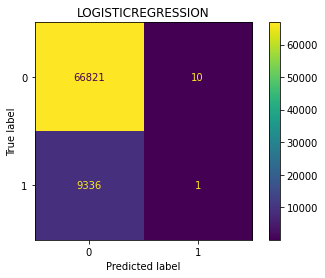


Training GaussianNB() ...

PredictingGaussianNB() scores ...


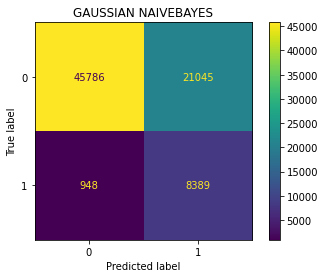


Training DecisionTreeClassifier() ...

PredictingDecisionTreeClassifier() scores ...


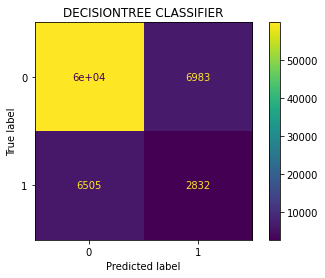


Training RandomForestClassifier() ...

PredictingRandomForestClassifier() scores ...


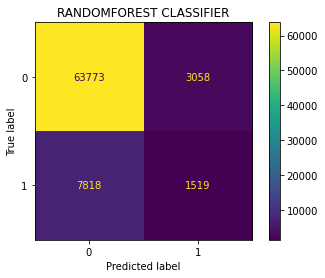


Training GradientBoostingClassifier() ...

PredictingGradientBoostingClassifier() scores ...


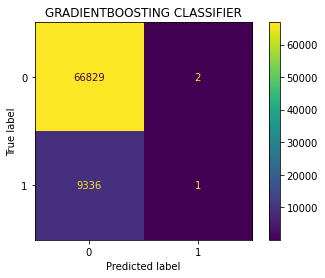


Training BaggingClassifier() ...

PredictingBaggingClassifier() scores ...


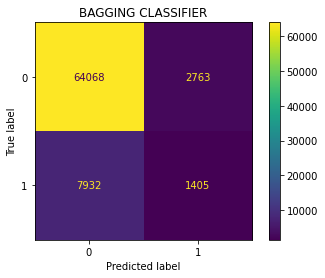


Training <catboost.core.CatBoostClassifier object at 0x7feeec40d090> ...

Predicting<catboost.core.CatBoostClassifier object at 0x7feeec40d090> scores ...


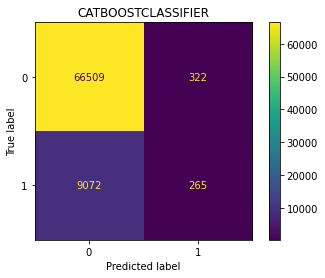


Training LGBMClassifier() ...

PredictingLGBMClassifier() scores ...


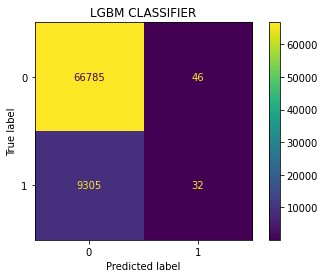

,Sampling,model_name,TP,FP,TN,FN,accuracy,balanced_accuracy,recall,precision,f1,f0.5,f2.0,roc_auc
0,None,LogisticRegression,1,10,66821,9336,0.877298,0.499979,0.000107,0.090909,0.000214,0.000533,0.000134,0.846898
1,None,Gaussian NaiveBayes,8389,21045,45786,948,0.711257,0.791785,0.898468,0.285011,0.432746,0.330086,0.628088,0.825207
2,None,DecisionTree Classifier,2832,6983,59848,6505,0.822918,0.599411,0.303309,0.288538,0.295739,0.291376,0.300235,0.600646
3,None,RandomForest Classifier,1519,3058,63773,7818,0.857210,0.558464,0.162686,0.331877,0.218341,0.274733,0.181157,0.821444
4,None,GradientBoosting Classifier,1,2,66829,9336,0.877403,0.500039,0.000107,0.333333,0.000214,0.000535,0.000134,0.854843
5,None,Bagging Classifier,1405,2763,64068,7932,0.859587,0.554567,0.150477,0.337092,0.208071,0.270099,0.169212,0.786181
6,None,CatBoostClassifier,265,322,66509,9072,0.876667,0.511782,0.028382,0.451448,0.053406,0.113393,0.034928,0.852722
7,None,LGBM Classifier,32,46,66785,9305,0.877232,0.501369,0.003427,0.410256,0.006798,0.016582,0.004275,0.855080


In [ ]:
models, names = get_models()
for i in range(len(models)):
  evaluate("None", names[i], models[i],X_train_scaled, y_train, X_test_scaled,y_test)
display_report()


Gaussian Naive Bayes has the best performing classifier with F2 and F1 score of 0.628088 and 0.432746 with normal training set


###Performing Sampling Techniques

####OverSampling SMOTE


In [ ]:
X_smote, y_smote = do_sampling(X_train_scaled, y_train, SMOTE)

In [ ]:
X_smote.shape, y_smote.shape

((534648, 31), (534648,))


Training LogisticRegression() ...

PredictingLogisticRegression() scores ...


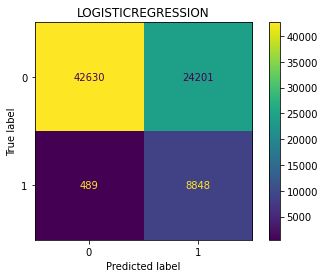


Training GaussianNB() ...

PredictingGaussianNB() scores ...


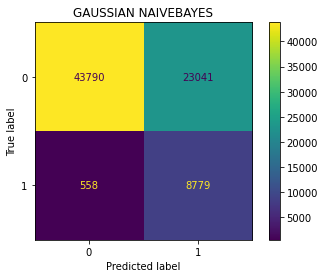


Training DecisionTreeClassifier() ...

PredictingDecisionTreeClassifier() scores ...


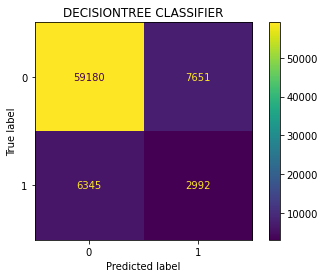


Training RandomForestClassifier() ...

PredictingRandomForestClassifier() scores ...


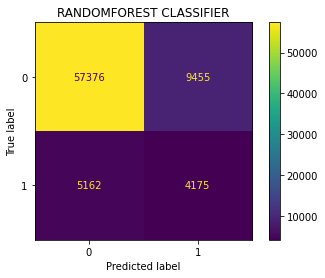


Training GradientBoostingClassifier() ...

PredictingGradientBoostingClassifier() scores ...


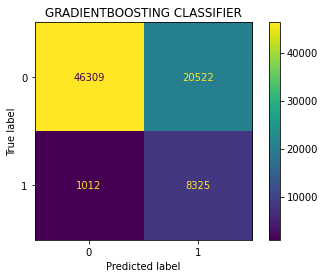


Training BaggingClassifier() ...

PredictingBaggingClassifier() scores ...


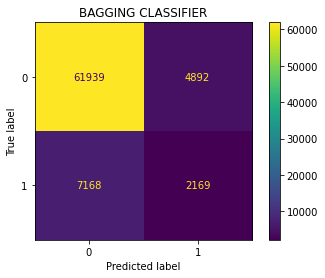


Training <catboost.core.CatBoostClassifier object at 0x7feeeb8e9e10> ...

Predicting<catboost.core.CatBoostClassifier object at 0x7feeeb8e9e10> scores ...


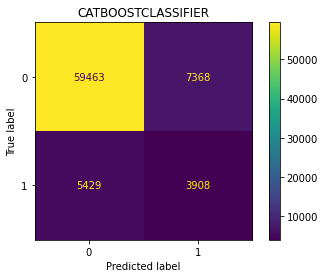


Training LGBMClassifier() ...

PredictingLGBMClassifier() scores ...


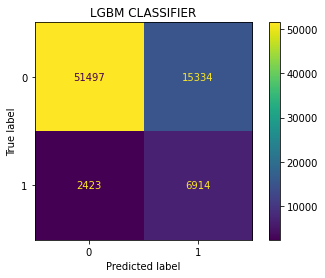

,Sampling,model_name,TP,FP,TN,FN,accuracy,balanced_accuracy,recall,precision,f1,f0.5,f2.0,roc_auc
0,None,LogisticRegression,1,10,66821,9336,0.877298,0.499979,0.000107,0.090909,0.000214,0.000533,0.000134,0.846898
1,None,Gaussian NaiveBayes,8389,21045,45786,948,0.711257,0.791785,0.898468,0.285011,0.432746,0.330086,0.628088,0.825207
2,None,DecisionTree Classifier,2832,6983,59848,6505,0.822918,0.599411,0.303309,0.288538,0.295739,0.291376,0.300235,0.600646
3,None,RandomForest Classifier,1519,3058,63773,7818,0.857210,0.558464,0.162686,0.331877,0.218341,0.274733,0.181157,0.821444
4,None,GradientBoosting Classifier,1,2,66829,9336,0.877403,0.500039,0.000107,0.333333,0.000214,0.000535,0.000134,0.854843
5,None,Bagging Classifier,1405,2763,64068,7932,0.859587,0.554567,0.150477,0.337092,0.208071,0.270099,0.169212,0.786181
6,None,CatBoostClassifier,265,322,66509,9072,0.876667,0.511782,0.028382,0.451448,0.053406,0.113393,0.034928,0.852722
7,None,LGBM Classifier,32,46,66785,9305,0.877232,0.501369,0.003427,0.410256,0.006798,0.016582,0.004275,0.855080
8,SMOTE Sampling,LogisticRegression,8848,24201,42630,489,0.675848,0.792753,0.947628,0.267724,0.417496,0.312577,0.628436,0.846813
9,SMOTE Sampling,Gaussian NaiveBayes,8779,23041,43790,558,0.690172,0.797736,0.940238,0.275896,0.426610,0.321300,0.634614,0.825692


In [ ]:
models, names = get_models()
for i in range(len(models)):
  evaluate("SMOTE Sampling", names[i],models[i],X_smote, y_smote, X_test_scaled,y_test)
display_report()

**Upon oversampling, a significant increase in performance is observed in all classifiers. Logistic Regression, Gaussian Naive Bayes and Gradient Boosting produces the best F2 and F1 scores of 0.62838, 0.63490, 0.629249 and 0.417279, 0.426209, 0.432196, respectively.**


#### UnderSampling : Tomek Links

In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler, BorderlineSMOTE, SMOTENC
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.combine import SMOTEENN, SMOTETomek

In [ ]:
X_tomek, y_tomek = do_sampling(X_train_scaled, y_train, TomekLinks)

In [ ]:
X_tomek.shape, y_tomek.shape

((289524, 31), (289524,))


Training LogisticRegression() ...

PredictingLogisticRegression() scores ...


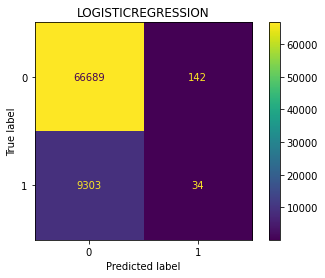


Training GaussianNB() ...

PredictingGaussianNB() scores ...


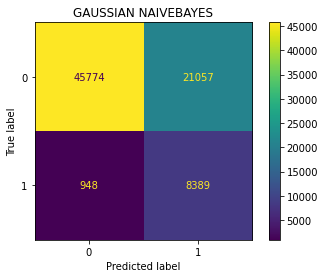


Training DecisionTreeClassifier() ...

PredictingDecisionTreeClassifier() scores ...


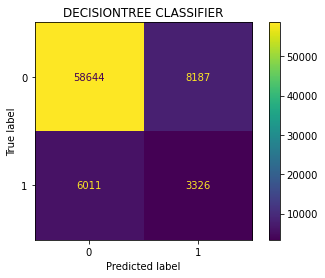


Training RandomForestClassifier() ...

PredictingRandomForestClassifier() scores ...


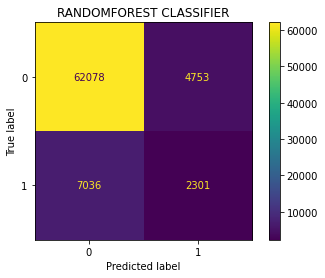


Training GradientBoostingClassifier() ...

PredictingGradientBoostingClassifier() scores ...


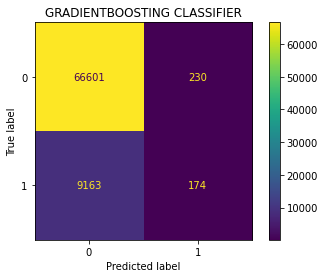


Training BaggingClassifier() ...

PredictingBaggingClassifier() scores ...


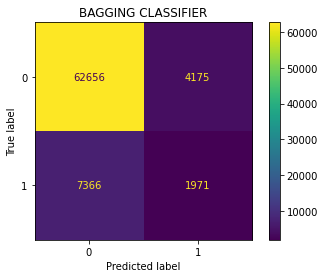


Training <catboost.core.CatBoostClassifier object at 0x7feeeb8e9d50> ...

Predicting<catboost.core.CatBoostClassifier object at 0x7feeeb8e9d50> scores ...


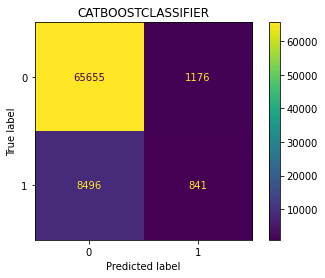


Training LGBMClassifier() ...

PredictingLGBMClassifier() scores ...


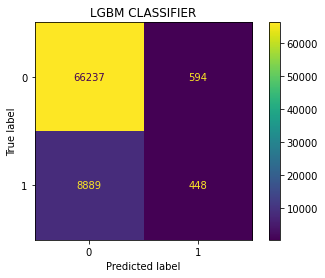

In [ ]:
models, names = get_models()
for i in range(len(models)):
  evaluate("Tomek Under Sampling", names[i],models[i],X_tomek, y_tomek, X_test_scaled,y_test)


In [ ]:
display_report()

,Sampling,model_name,TP,FP,TN,FN,accuracy,balanced_accuracy,recall,precision,f1,f0.5,f2.0,roc_auc
0,None,LogisticRegression,1,10,66821,9336,0.877298,0.499979,0.000107,0.090909,0.000214,0.000533,0.000134,0.846898
1,None,Gaussian NaiveBayes,8389,21045,45786,948,0.711257,0.791785,0.898468,0.285011,0.432746,0.330086,0.628088,0.825207
2,None,DecisionTree Classifier,2832,6983,59848,6505,0.822918,0.599411,0.303309,0.288538,0.295739,0.291376,0.300235,0.600646
3,None,RandomForest Classifier,1519,3058,63773,7818,0.857210,0.558464,0.162686,0.331877,0.218341,0.274733,0.181157,0.821444
4,None,GradientBoosting Classifier,1,2,66829,9336,0.877403,0.500039,0.000107,0.333333,0.000214,0.000535,0.000134,0.854843
5,None,Bagging Classifier,1405,2763,64068,7932,0.859587,0.554567,0.150477,0.337092,0.208071,0.270099,0.169212,0.786181
6,None,CatBoostClassifier,265,322,66509,9072,0.876667,0.511782,0.028382,0.451448,0.053406,0.113393,0.034928,0.852722
7,None,LGBM Classifier,32,46,66785,9305,0.877232,0.501369,0.003427,0.410256,0.006798,0.016582,0.004275,0.855080
8,SMOTE Sampling,LogisticRegression,8848,24201,42630,489,0.675848,0.792753,0.947628,0.267724,0.417496,0.312577,0.628436,0.846813
9,SMOTE Sampling,Gaussian NaiveBayes,8779,23041,43790,558,0.690172,0.797736,0.940238,0.275896,0.426610,0.321300,0.634614,0.825692


**Although a notable increase in performance is observed in some models, the results in comparison to other techniques are subpar. The best performing model was the Gaussian Naive Bayes model with F2 and F1 scores of 0.432612 and 0.284894.**


#### Combination of Undersampling and oversampling

In [ ]:
X_SMOTEENN, y_SMOTEENN = do_sampling(X_train_scaled, y_train, SMOTEENN)


In [ ]:
X_SMOTEENN.shape, y_SMOTEENN.shape

((405665, 31), (405665,))


Training LogisticRegression() ...

PredictingLogisticRegression() scores ...


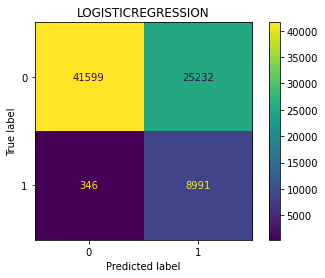


Training GaussianNB() ...

PredictingGaussianNB() scores ...


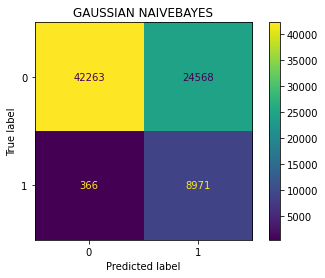


Training DecisionTreeClassifier() ...

PredictingDecisionTreeClassifier() scores ...


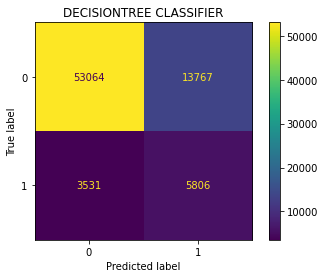


Training RandomForestClassifier() ...

PredictingRandomForestClassifier() scores ...


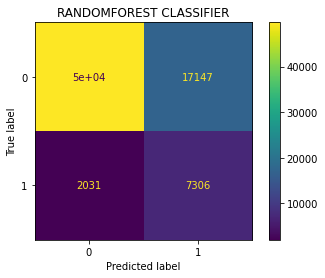


Training GradientBoostingClassifier() ...

PredictingGradientBoostingClassifier() scores ...


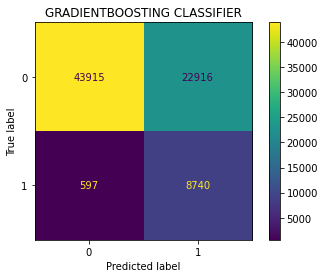


Training BaggingClassifier() ...

PredictingBaggingClassifier() scores ...


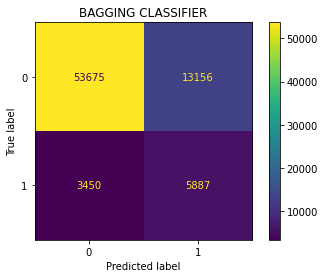


Training <catboost.core.CatBoostClassifier object at 0x7feeec1f2090> ...

Predicting<catboost.core.CatBoostClassifier object at 0x7feeec1f2090> scores ...


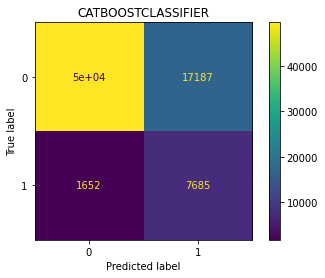


Training LGBMClassifier() ...

PredictingLGBMClassifier() scores ...


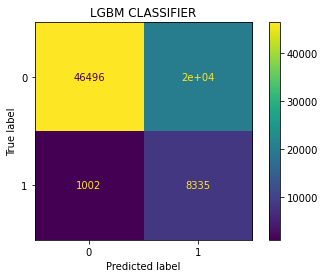

In [ ]:
models, names = get_models()

for i in range(len(models)):
  evaluate("SMOTE-ENN Sampling",names[i],models[i],X_SMOTEENN, y_SMOTEENN, X_test_scaled, y_test)


In [ ]:
display_report()

,Sampling,model_name,TP,FP,TN,FN,accuracy,balanced_accuracy,recall,precision,f1,f0.5,f2.0,roc_auc
0,None,LogisticRegression,1,10,66821,9336,0.877298,0.499979,0.000107,0.090909,0.000214,0.000533,0.000134,0.846898
1,None,Gaussian NaiveBayes,8389,21045,45786,948,0.711257,0.791785,0.898468,0.285011,0.432746,0.330086,0.628088,0.825207
2,None,DecisionTree Classifier,2832,6983,59848,6505,0.822918,0.599411,0.303309,0.288538,0.295739,0.291376,0.300235,0.600646
3,None,RandomForest Classifier,1519,3058,63773,7818,0.857210,0.558464,0.162686,0.331877,0.218341,0.274733,0.181157,0.821444
4,None,GradientBoosting Classifier,1,2,66829,9336,0.877403,0.500039,0.000107,0.333333,0.000214,0.000535,0.000134,0.854843
5,None,Bagging Classifier,1405,2763,64068,7932,0.859587,0.554567,0.150477,0.337092,0.208071,0.270099,0.169212,0.786181
6,None,CatBoostClassifier,265,322,66509,9072,0.876667,0.511782,0.028382,0.451448,0.053406,0.113393,0.034928,0.852722
7,None,LGBM Classifier,32,46,66785,9305,0.877232,0.501369,0.003427,0.410256,0.006798,0.016582,0.004275,0.855080
8,SMOTE Sampling,LogisticRegression,8848,24201,42630,489,0.675848,0.792753,0.947628,0.267724,0.417496,0.312577,0.628436,0.846813
9,SMOTE Sampling,Gaussian NaiveBayes,8779,23041,43790,558,0.690172,0.797736,0.940238,0.275896,0.426610,0.321300,0.634614,0.825692


**The ensemble models saw the highest performance when trained on the SMOTE-ENN dataset. LightGBM, Gradient Boosting and Gaussian Naive Bayes had the highest performances in this sample with F2 and F1 scores of 0.633123, 0.632103, 0.630923 and 0.438795, 0.424206, 0.415549.**


#Result

In [ ]:
display_report().to_csv('New_Final_Report.csv')

In [ ]:
final_report = display_report()

In [ ]:
final_report.sort_values([ 'f1'], ascending = False).head(5)

,Sampling,model_name,TP,FP,TN,FN,accuracy,balanced_accuracy,recall,precision,f1,f0.5,f2.0,roc_auc
30,SMOTE-ENN Sampling,CatBoostClassifier,7685,17187,49644,1652,0.752665,0.782949,0.823070,0.308982,0.449297,0.353090,0.617567,0.851386
31,SMOTE-ENN Sampling,LGBM Classifier,8335,20335,46496,1002,0.719869,0.794205,0.892685,0.290722,0.438603,0.336043,0.631267,0.852508
15,SMOTE Sampling,LGBM Classifier,6914,15334,51497,2423,0.766871,0.755525,0.740495,0.310770,0.437803,0.351575,0.580072,0.847136
12,SMOTE Sampling,GradientBoosting Classifier,8325,20522,46309,1012,0.717283,0.792270,0.891614,0.288592,0.436047,0.333734,0.628824,0.850629
1,None,Gaussian NaiveBayes,8389,21045,45786,948,0.711257,0.791785,0.898468,0.285011,0.432746,0.330086,0.628088,0.825207


In [ ]:
final_report.sort_values([ 'f2.0'], ascending = False).head(5)

,Sampling,model_name,TP,FP,TN,FN,accuracy,balanced_accuracy,recall,precision,f1,f0.5,f2.0,roc_auc
9,SMOTE Sampling,Gaussian NaiveBayes,8779,23041,43790,558,0.690172,0.797736,0.940238,0.275896,0.426610,0.321300,0.634614,0.825692
28,SMOTE-ENN Sampling,GradientBoosting Classifier,8740,22916,43915,597,0.691301,0.796583,0.936061,0.276093,0.426414,0.321416,0.633297,0.851763
25,SMOTE-ENN Sampling,Gaussian NaiveBayes,8971,24568,42263,366,0.672645,0.796594,0.960801,0.267480,0.418463,0.312594,0.632768,0.824740
31,SMOTE-ENN Sampling,LGBM Classifier,8335,20335,46496,1002,0.719869,0.794205,0.892685,0.290722,0.438603,0.336043,0.631267,0.852508
12,SMOTE Sampling,GradientBoosting Classifier,8325,20522,46309,1012,0.717283,0.792270,0.891614,0.288592,0.436047,0.333734,0.628824,0.850629


In [ ]:
a = final_report.copy()
a['Name'] = a['Sampling'] + a['model_name']

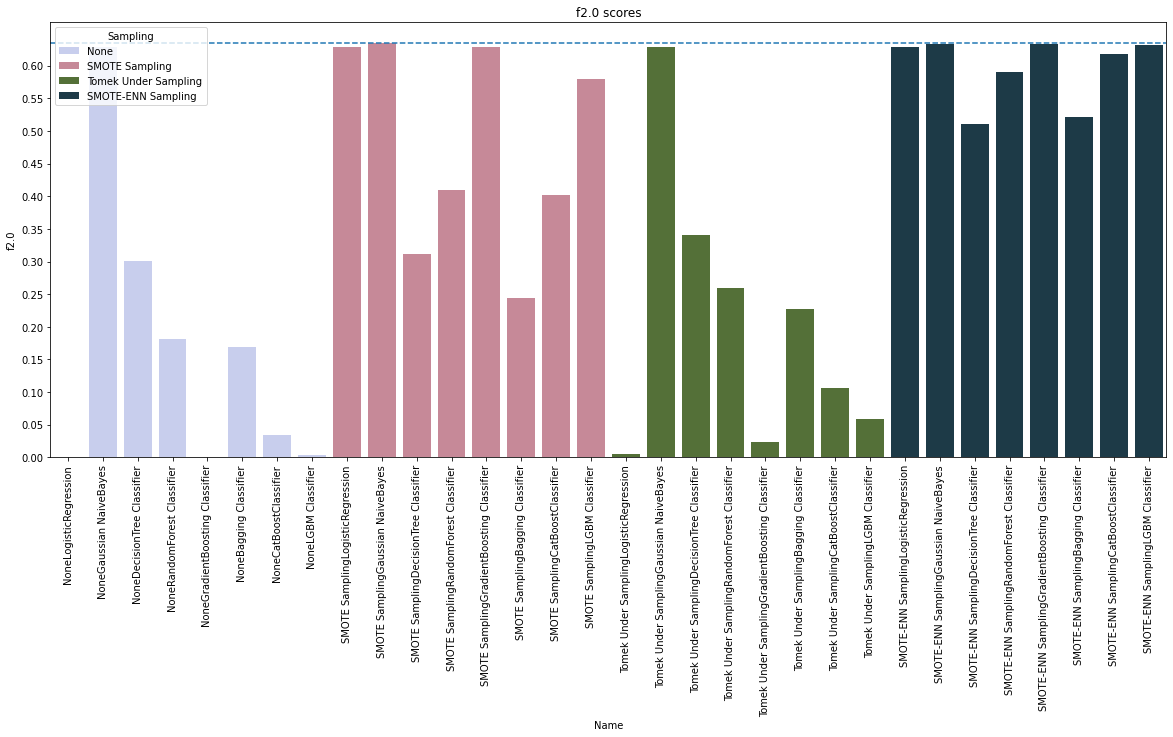

In [ ]:
metrics = ['f2.0']
for i in metrics:
  print('\n')
  plt.figure(figsize = (20,8))
  sns.barplot( y = i, x = 'Name',hue = 'Sampling' ,data=a, palette = 'cubehelix_r',dodge=False)
  plt.yticks(ticks = np.arange(0,final_report[i].max(), .05 ))
  plt.xticks(rotation =90)
  plt.axhline(y = final_report[i].max(), ls = '--')
  plt.title(f"{i} scores")
  plt.show()


If maximizing precision minimizes false positives, and maximizing recall minimizes false negatives, then the F2-measure puts more attention on minimizing false negatives than minimizing false positives.

Here minimizing false negatives is important because it means that the insurance company is losing on potential customers. Therefore, it would be smart to look for a metric that focuses on reducing false negatives more. Hence, F2 score could potentially be a good metric

---
> **Best performing models:**


>1.   **SMOTE sampled Gaussian Naive Bayes**
2.   **SMOTE-ENN sampled LightGBM**
3.   **SMOTE-ENN sampled Gradient Boosting**


---

#Hyperparameter Tuning

In [ ]:
pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, HalvingGridSearchCV, HalvingRandomSearchCV
from sklearn.metrics import fbeta_score, make_scorer

###Gaussian Naive Bayes Classifier

>* **Gaussian Naive Bayes works based on the Bayes Theorem and does not have any parameters to tune**

###Gradient Boosting Classifier

In [ ]:
f2 = make_scorer(fbeta_score, beta =2) #Setting Performance Metric

In [ ]:
gbc = GradientBoostingClassifier(learning_rate = 0.01)
parameters = {
    "n_estimators":[350,400,450],
    "max_depth":[5,9,11],
}

In [ ]:
cv = HalvingGridSearchCV(gbc,parameters,scoring = f2, cv=3, n_jobs = -1, verbose = 1, aggressive_elimination =True)
cv.fit(X_SMOTEENN,y_SMOTEENN)
cv.best_params_, cv.best_score_

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 45073
max_resources_: 405665
aggressive_elimination: True
factor: 3
----------
iter: 0
n_candidates: 9
n_resources: 45073
Fitting 3 folds for each of 9 candidates, totalling 27 fits
----------
iter: 1
n_candidates: 3
n_resources: 135219
Fitting 3 folds for each of 3 candidates, totalling 9 fits
----------
iter: 2
n_candidates: 1
n_resources: 405657
Fitting 3 folds for each of 1 candidates, totalling 3 fits


({'max_depth': 5, 'n_estimators': 400}, 0.9579340170668988)

In [ ]:
tuned_gbc = GradientBoostingClassifier(**cv.best_params_)

In [ ]:
tuned_gbc.fit(X_SMOTEENN, y_SMOTEENN)
y_pred = tuned_gbc.predict(X_test_scaled)
fbeta_score(y_test,y_pred,beta = 2.0)

0.6206946268943643


Training GradientBoostingClassifier(max_depth=5, n_estimators=400) ...

PredictingGradientBoostingClassifier(max_depth=5, n_estimators=400) scores ...


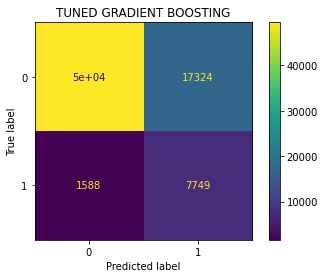

In [ ]:
evaluate("SMOTE-ENN Sampling","Tuned Gradient Boosting",tuned_gbc,X_SMOTEENN, y_SMOTEENN, X_test_scaled, y_test)

###Light GBM Classifier

In [ ]:
lgbm = lgb.LGBMClassifier()
parameters = {
    "n_estimators":[200,300,400],
    "max_depth":[3,5,9],
    }
  

In [ ]:
cv = HalvingGridSearchCV(lgbm,parameters,scoring = f2, cv=3, n_jobs = -1, verbose = 1)
cv.fit(X_SMOTEENN,y_SMOTEENN)
cv.best_params_, cv.best_score_

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 45073
max_resources_: 405665
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 9
n_resources: 45073
Fitting 3 folds for each of 9 candidates, totalling 27 fits
----------
iter: 1
n_candidates: 3
n_resources: 135219
Fitting 3 folds for each of 3 candidates, totalling 9 fits
----------
iter: 2
n_candidates: 1
n_resources: 405657
Fitting 3 folds for each of 1 candidates, totalling 3 fits


({'max_depth': 5, 'n_estimators': 200}, 0.9575841282754213)

In [ ]:
tuned_lgbm = lgb.LGBMClassifier(**cv.best_params_)
tuned_lgbm.fit(X_SMOTEENN, y_SMOTEENN)
y_pred = tuned_lgbm.predict(X_test_scaled)
fbeta_score(y_test,y_pred,beta = 2.0)

0.6326265555152835


Training LGBMClassifier(max_depth=5, n_estimators=200) ...

PredictingLGBMClassifier(max_depth=5, n_estimators=200) scores ...


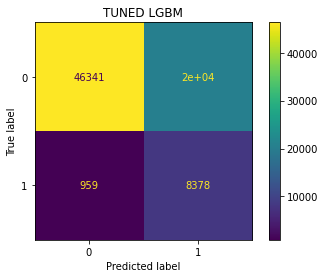

In [ ]:
evaluate("SMOTE-ENN Sampling","Tuned LGBM",tuned_lgbm,X_SMOTEENN, y_SMOTEENN, X_test_scaled, y_test)

> **The Tuned models haven't produced higher performers than the baseline learners. Therefore, with the highest F2 score, the SMOTE sampled Gaussian Naive Bayes model is finalized as the best classifier for vehicle insurance cross sale response prediction.**

#Model Explainability

##Gaussian Naive Bayes

In [ ]:
gnbc = GaussianNB()
gnbc.fit(X_smote, y_smote)

GaussianNB()

####SHAP Explainability

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 564 kB 7.6 MB/s 


In [ ]:
import shap

In [ ]:
explainer = shap.explainers.Sampling(gnbc.predict_proba, X_smote)

In [ ]:
shap_values = explainer.shap_values(X_test_scaled[:5])

  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
shap.initjs()
i = 4
shap.force_plot(explainer.expected_value, shap_values[i], features=X_test_scaled.iloc[i], feature_names=X_test_scaled.columns)

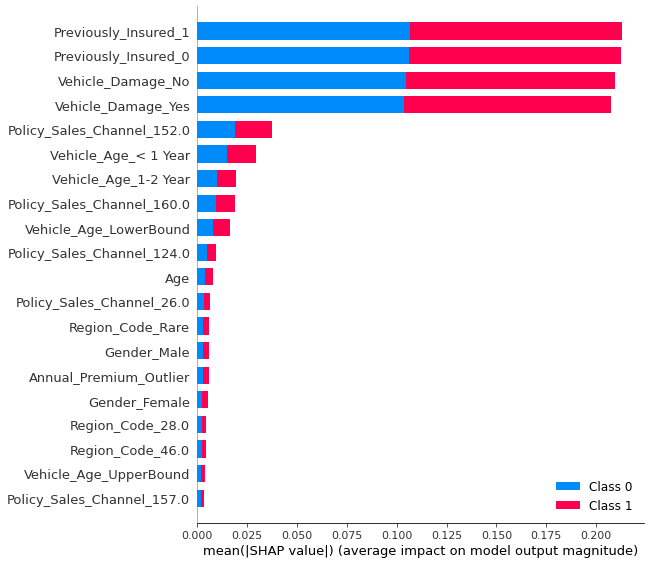

In [ ]:
shap.summary_plot(shap_values, features= X_test_scaled, feature_names= X_test_scaled.columns, plot_type='bar')      

#Conclusions

> * **Upon Exploratory Data Analysis, we found that there was strong association in response with the customer’s vehicle’s age, existing vehicle damages and if the customer has any ongoing vehicle insurance.We found that most customers that purchased vehicle insurance had existing damages in their vehicles, weren’t previously insured and their vehicle was over a year old.**

> * **It was also observed that most policyholders of the health insurance company come from three region codes: 28,8 and 41 and the policy sales channels most preferred to reach out to the clients were  152, 26.0 and 124.**

> * **During initial model deployment and evaluation, the highest performing model was SMOTE sampled Gaussian Naive Bayes classifier, with an F2 score of 0.634614, precision of 27.58 percent and recall of 94.02 percent.**

> * **It was earlier observed in the project that when the health insurance clients were approached for cross sale, approximately, one in every ten clients had a positive cross sale response. The finalized model has a success rate of 27.58 percent which means that, approximately, three out of every ten predicted buyers produced a positive response.**

> * **This model not only helps identify 94.26 percent of the potential buyers among existing customers but has also increased the success rate of cross sales. Thus, helping the company save a significant amount of time and resources by generating better leads.** 

> * **The finalized model’s predictions are highly dependent on the customer’s  previous insurance status and existing damages on the vehicle.** 
